https://sosoeasy.tistory.com/382

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
# pd.options.display.float_format = '{:,.2f}'.format
# pd.options.display.max_rows = 100
# pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_log_error, mean_squared_error,  r2_score, mean_absolute_error

In [97]:
test = pd.read_csv('./raw_data/buy.csv', index_col=0)

In [ ]:
check = pd.read_csv('./raw_data/')

In [106]:
# test = test[test['sm_cat']=='남성향수']
# test.drop(['sex', 'big_cat'], axis=1, inplace=True)
test = test.groupby(['date','sm_cat']).sum()

In [111]:
test.reset_index(inplace=True)

In [112]:
test.drop('sm_cat', axis=1, inplace=True)
test.rename({'qty':'남성향수'}, inplace=True)
test

,date,qty
0,20180908,1
1,20190316,1
2,20190317,1
3,20190328,1
4,20190329,1
...,...,...
67,20191120,1
68,20191208,1
69,20191216,1
70,20191225,1


In [43]:
plt.rc('font', family='AppleGothic')

In [37]:
raw_all = pd.read_csv('./data/buy_day.csv', index_col=0)

In [38]:
# # 명절 더미변수

# raw_all['holiday'] = 0
# raw_all.iloc[6, :] = 1
# raw_all.iloc[37:39, :] = 1
# raw_all.iloc[56:58, :] = 1
# raw_all.iloc[88, :] = 1

(1) 독립시계열과 종속시계열이 모두 정상성 ( stationality )를 가져야 함

(2) 정상성을 가지지 못한 시계열은 정상성 시계열로 변환

# 독립 시계열의 정상성 검정

In [46]:
# 독립변수
weather = raw_all[['일강수량', '평균기온', '미세먼지']]

In [47]:
# day 단위일 때 datetime 변환
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

# 일강수량

<function matplotlib.pyplot.show(close=None, block=None)>

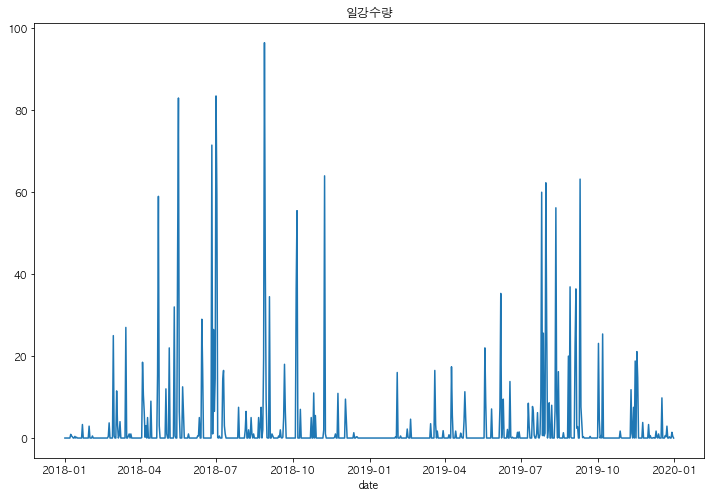

In [49]:
plt.figure(figsize=(12, 8))
plt.plot(df['일강수량'])
plt.title('일강수량')
plt.xlabel('date')
plt.show

<Figure size 432x288 with 0 Axes>

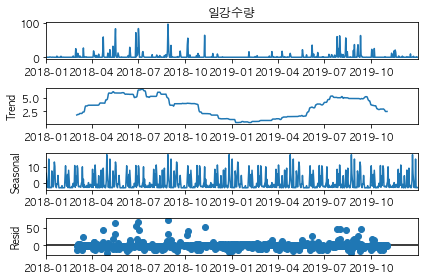

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['일강수량'], model = 'additive', freq=120) 
# additive: 가법 모형
# freq : 바꿔가며 맞춰가기 (주별 패턴이 있는 일별 데이터의 경우 7로 초기 설정할 수 있음)

fig = plt.figure()
fig = result.plot()

# ACF 그래프

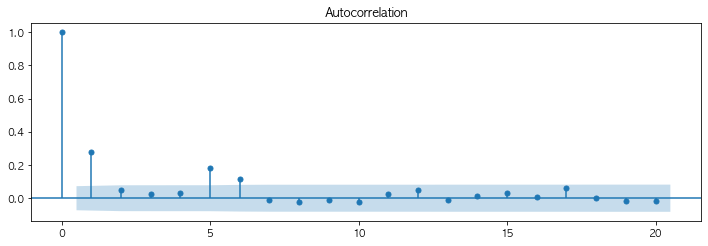

In [58]:
fig = plt.figure(figsize=(12, 8))
axl = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['일강수량'], lags = 20, ax=axl)

# ADF 검정 (단위근 검정)
- 귀무가설: 자료에 단위근이 존재한다. 즉, 정상성을 만족하지 않는다.
- 대립가설: 자료가 정상성을 만족한다

In [59]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['일강수량'])
print('ADF Statistic : %f' % result[0])
print('P-value : %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic : -9.142741
P-value : 0.000000
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


ADF Statistic 가 Critical Value보다 작고, P-value가 0.05를 넘지 않으므로 정상성을 만족. 귀무가설 기각.

# 평균기온

### 주별

In [116]:
# week = pd.read_csv('./data/buy_week.csv', index_col=0)
week = week[['평균기온']]
week

,평균기온
date,
2018-01-01/2018-01-07,-2.746905
2018-01-08/2018-01-14,-5.091630
2018-01-15/2018-01-21,2.662610
2018-01-22/2018-01-28,-10.102358
2018-01-29/2018-02-04,-5.625929
...,...
2019-12-02/2019-12-08,-1.579553
2019-12-09/2019-12-15,3.865742
2019-12-16/2019-12-22,2.526359


<function matplotlib.pyplot.show(close=None, block=None)>

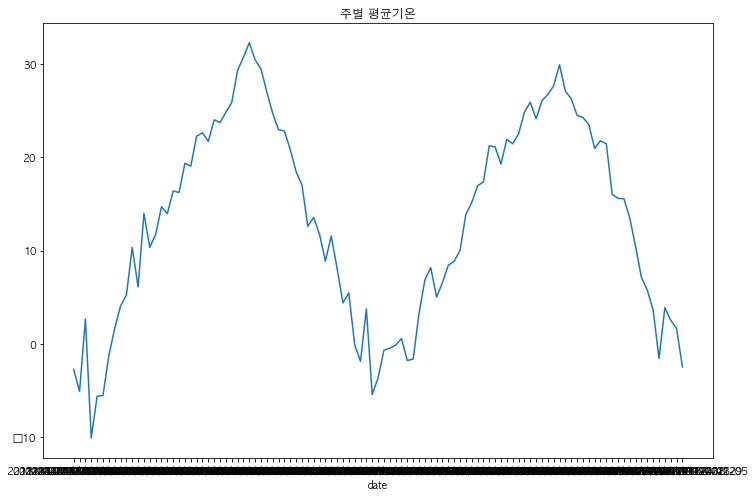

In [117]:
plt.figure(figsize=(12, 8))
plt.plot(week)
plt.title('주별 평균기온')
plt.xlabel('date')
plt.show

<Figure size 432x288 with 0 Axes>

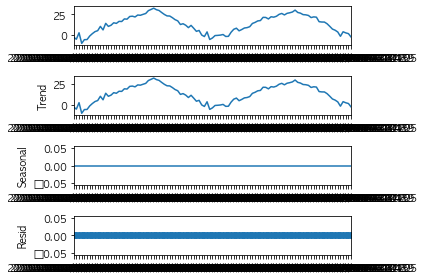

In [119]:
result = seasonal_decompose(week, model = 'additive', freq=1) 
# additive: 가법 모형
# freq : 바꿔가며 맞춰가기 (주별 패턴이 있는 일별 데이터의 경우 7로 초기 설정할 수 있음)

fig = plt.figure()
fig = result.plot()

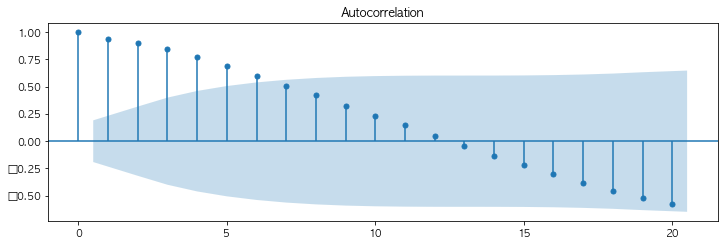

In [120]:
fig = plt.figure(figsize=(12, 8))
axl = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(week, lags = 20, ax=axl)

In [121]:
result = adfuller(week)
print('ADF Statistic : %f' % result[0])
print('P-value : %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic : -3.962759
P-value : 0.001619
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584


### 일별

<function matplotlib.pyplot.show(close=None, block=None)>

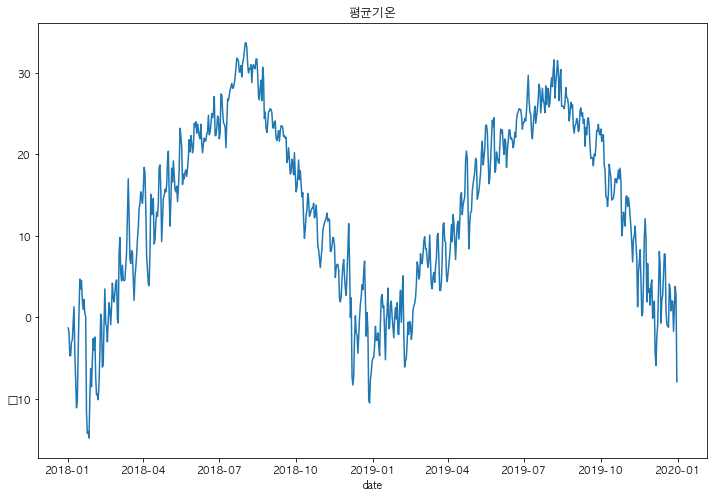

In [60]:
plt.figure(figsize=(12, 8))
plt.plot(df['평균기온'])
plt.title('평균기온')
plt.xlabel('date')
plt.show

<Figure size 432x288 with 0 Axes>

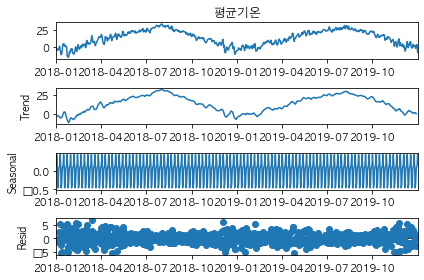

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['평균기온'], model = 'additive', freq=7) 
# additive: 가법 모형
# freq : 바꿔가며 맞춰가기 (주별 패턴이 있는 일별 데이터의 경우 7로 초기 설정할 수 있음)

fig = plt.figure()
fig = result.plot()

# ACF 그래프

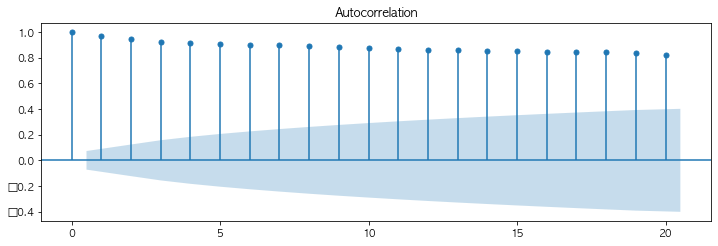

In [62]:
fig = plt.figure(figsize=(12, 8))
axl = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['평균기온'], lags = 20, ax=axl)

값이 아주 천천히 감소함 = 정상성을 만족하지 않음

# ADF 검정 (단위근)

In [63]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['평균기온'])
print('ADF Statistic : %f' % result[0])
print('P-value : %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic : -1.182081
P-value : 0.681256
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


ADF Statistic 가 Critical Value보다 크고, P-value가 0.05를 넘으므로 정상성을 만족하지 않음. 귀무가설 기각하지 못함.

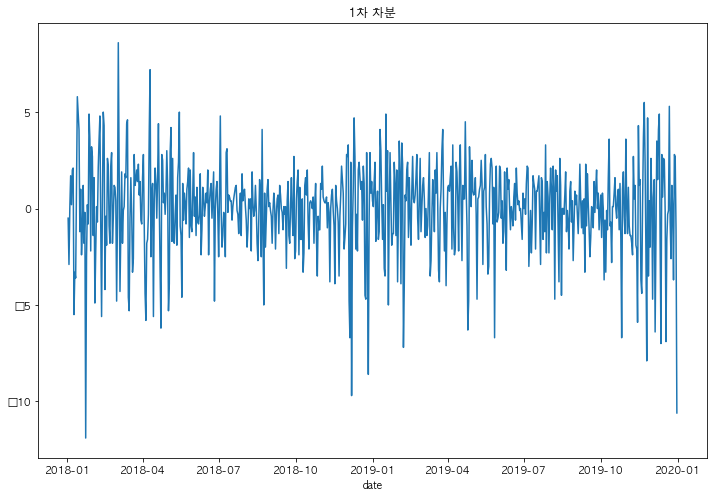

In [64]:
# 1차 차분
df_diff = df['평균기온'] - df['평균기온'].shift()
plt.figure(figsize=(12, 8))
plt.plot(df_diff)
plt.title('1차 차분')
plt.xlabel('date')
plt.show()

In [65]:
result = adfuller(df_diff[1:])
print('ADF Statistic : %f' % result[0])
print('P-value : %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic : -6.348058
P-value : 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [114]:
df['평균기온']

date
2018-01-01   -1.3
2018-01-02   -1.8
2018-01-03   -4.7
2018-01-04   -4.7
2018-01-05   -3.0
             ... 
2019-12-27   -1.7
2019-12-28    1.1
2019-12-29    3.8
2019-12-30    2.7
2019-12-31   -7.9
Name: 평균기온, Length: 730, dtype: float64

In [113]:
df_diff

date
2018-01-01     NaN
2018-01-02    -0.5
2018-01-03    -2.9
2018-01-04     0.0
2018-01-05     1.7
              ... 
2019-12-27    -3.7
2019-12-28     2.8
2019-12-29     2.7
2019-12-30    -1.1
2019-12-31   -10.6
Name: 평균기온, Length: 730, dtype: float64

p-value가 0.05보다 작으므로 귀무가설 기각. 정상성 만족.

# 미세먼지

<function matplotlib.pyplot.show(close=None, block=None)>

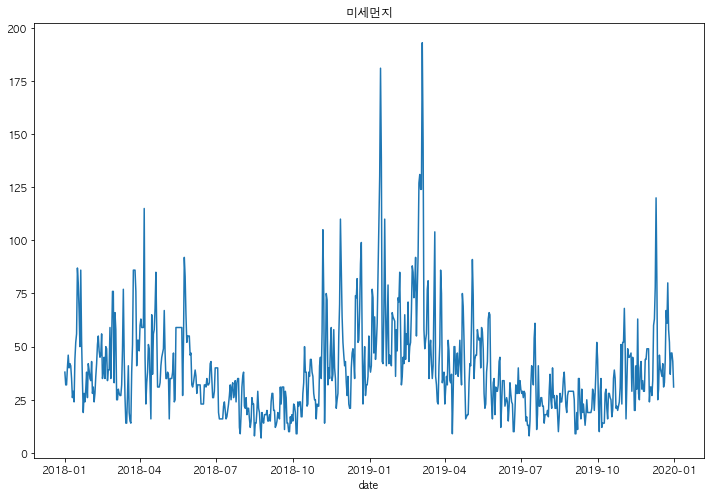

In [66]:
plt.figure(figsize=(12, 8))
plt.plot(df['미세먼지'])
plt.title('미세먼지')
plt.xlabel('date')
plt.show

<Figure size 432x288 with 0 Axes>

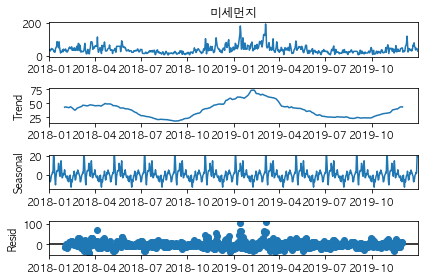

In [69]:
result = seasonal_decompose(df['미세먼지'], model = 'additive', freq=60) 
# additive: 가법 모형
# freq : 바꿔가며 맞춰가기 (주별 패턴이 있는 일별 데이터의 경우 7로 초기 설정할 수 있음)

fig = plt.figure()
fig = result.plot()

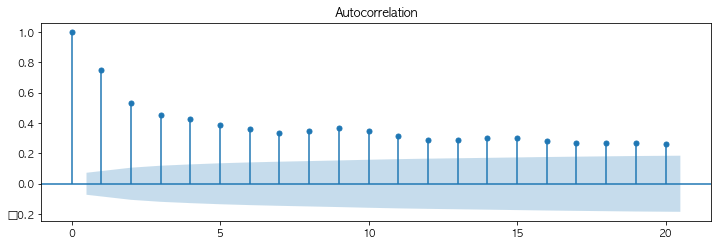

In [70]:
fig = plt.figure(figsize=(12, 8))
axl = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['미세먼지'], lags = 20, ax=axl)

In [71]:
result = adfuller(df['미세먼지'])
print('ADF Statistic : %f' % result[0])
print('P-value : %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic : -4.482103
P-value : 0.000212
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


정상성 만족하는 듯?

> 일강수량, 평균기온, 미세먼지 중에서 평균기온만 정상시계열로 차분해주면 되겠다.

# 종속변수(상품)

In [88]:
for i, k in zip(raw_all.columns, raw_all.isnull().sum()):
    if k >0:
        print(i, k)

남성향수 365
일사량 2


In [89]:
raw_all['남성향수']

date
2018-01-01    0.0
2018-01-02    0.0
2018-01-03    0.0
2018-01-04    0.0
2018-01-05    0.0
             ... 
2019-12-27    NaN
2019-12-28    NaN
2019-12-29    NaN
2019-12-30    NaN
2019-12-31    NaN
Name: 남성향수, Length: 730, dtype: float64

In [81]:
non_stationary = []
stationary = []

for product in raw_all.columns[:-11]:
    temp = raw_all[[product]]
    dftest = adfuller(temp, autolag='AIC', maxlag = 20)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value',  '#Lags Used', 'Number of Observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < 0.05:
        stationary.append(product)
    else:
        non_stationary.append(product)

MissingDataError: exog contains inf or nans

In [35]:
raw_all

,기능성 링클케어 화장품,기능성 모공관리 화장품,기능성 아이케어 화장품,기능성 영양보습 화장품,기능성 트러블케어 화장품,기능성 화이트닝 화장품,기능성 화장품 세트,기초 화장용 로션,기초 화장용 미스트,기초 화장용 스킨,...,평균습도,일강수량,평균기온,일교차,평균풍속,증발량,미세먼지,일사량,뉴미세먼지,초미세먼지
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,3,20,364,13,44,0,9,500,128,516,...,39.1,0.0,-1.3,8.9,1.4,1.0,38.0,6.14,33.0,18.0
2018-01-02,31,38,324,24,47,0,14,645,185,666,...,42.0,0.0,-1.8,6.1,1.8,1.3,32.0,5.36,32.0,20.0
2018-01-03,11,40,415,11,66,0,10,596,207,585,...,42.3,0.0,-4.7,6.7,2.2,1.4,32.0,6.56,30.0,18.0
2018-01-04,2,27,657,11,51,1,21,535,174,549,...,43.0,0.0,-4.7,8.0,1.4,0.9,40.0,4.73,39.0,24.0
2018-01-05,5,28,643,5,52,0,43,531,134,517,...,48.4,0.0,-3.0,7.2,1.7,1.4,46.0,5.96,48.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,8,44,260,13,48,0,65,409,219,506,...,45.4,0.0,-1.7,7.2,2.1,1.5,37.0,10.36,33.0,28.0
2019-12-28,2,28,167,7,54,0,23,349,149,369,...,47.6,0.0,1.1,9.7,2.0,1.4,47.0,8.09,44.0,33.0
2019-12-29,9,47,1532,9,59,0,9,404,205,452,...,52.5,1.4,3.8,5.1,2.9,1.1,47.0,3.28,45.0,33.0


In [30]:
from module import stationarity_adf_test, stationarity_kpss_test

ModuleNotFoundError: No module named 'module'

In [24]:
df['Weeks'] =  
new_cases_daily_total_modified['Weeks'].astype('datetime64[ns]')
df.resample('W-Mon', label='left', closed = 'left', on='date').sum()

KeyError: 'The grouper name date is not found'

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# ts = df.timeseries
result = seasonal_decompose(df, model='additive')

plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()


ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [ ]:

    # 시계열분해(trend, seasonal)
    result = sm.tsa.seasonal_decompose(raw_fe['count'], model='additive')
    
    Y_trend = pd.DataFrame(result.trend)
    Y_trend.fillna(method='ffill', inplace=True)
    Y_trend.fillna(method='bfill', inplace=True)
    Y_trend.columns = ['count_trend']
    
    Y_seasonal = pd.DataFrame(result.seasonal)
    Y_seasonal.fillna(method='ffill', inplace=True)
    Y_seasonal.fillna(method='bfill', inplace=True)
    Y_seasonal.columns = ['count_seasonal']
    
    pd.concat([raw_fe, Y_trend, Y_seasonal], axis=1).isnull().sum()
    if 'count_trend' not in raw_fe.columns:
        if 'count_seasonal' not in raw_fe.columns:
            raw_fe = pd.concat([raw_fe, Y_trend, Y_seasonal], axis=1)
    
    # 이동평균
    # (일단위)
    Y_count_Day = raw_fe[['count']].rolling(24).mean()
    Y_count_Day.fillna(method='ffill', inplace=True)
    Y_count_Day.fillna(method='bfill', inplace=True)
    Y_count_Day.columns = ['count_Day']
    
    # (주단위)
    Y_count_Week = raw_fe[['count']].rolling(24*7).mean()
    Y_count_Week.fillna(method='ffill', inplace=True)
    Y_count_Week.fillna(method='bfill', inplace=True)
    Y_count_Week.columns = ['count_Week']
    
    if 'count_Day' not in raw_fe.columns:
        raw_fe = pd.concat([raw_fe, Y_count_Day], axis=1)
    if 'count_Week' not in raw_fe.columns:
        raw_fe = pd.concat([raw_fe, Y_count_Week], axis=1)

    # 이전 값과의 차이
    Y_diff = raw_fe[['count']].diff()
    Y_diff.fillna(method='ffill', inplace=True)
    Y_diff.fillna(method='bfill', inplace=True)
    Y_diff.columns = ['count_diff']
    if 'count_diff' not in raw_fe.columns:
        raw_fe = pd.concat([raw_fe, Y_diff], axis=1)

    # 10개로 자르기
    raw_fe['temp_group'] = pd.cut(raw_fe['temp'], 10) 

    # 시간대별 att생성하기
    raw_fe['Year'] = raw_fe.datetime.dt.year 
    raw_fe['Quater'] = raw_fe.datetime.dt.quarter
    raw_fe['Quater_ver2'] = raw_fe['Quater'] + (raw_fe.Year - raw_fe.Year.min()) * 4
    raw_fe['Month'] = raw_fe.datetime.dt.month
    raw_fe['Day'] = raw_fe.datetime.dt.day
    raw_fe['Hour'] = raw_fe.datetime.dt.hour
    raw_fe['DayofWeek'] = raw_fe.datetime.dt.dayofweek

    # 이동
    raw_fe['count_lag1'] = raw_fe['count'].shift(1)
    raw_fe['count_lag2'] = raw_fe['count'].shift(2)
    raw_fe['count_lag1'].fillna(method='bfill', inplace=True)
    raw_fe['count_lag2'].fillna(method='bfill', inplace=True)

    # 더미데이터만들기
    if 'Quater' in raw_fe.columns:
        if 'Quater_Dummy' not in ['_'.join(col.split('_')[:2]) for col in raw_fe.columns]:
            raw_fe = pd.concat([raw_fe, pd.get_dummies(raw_fe['Quater'], prefix='Quater_Dummy', drop_first=True)], axis=1)
            del raw_fe['Quater']
    return raw_fe
# raw_fe = feature_engineering(raw_all)